# HW1: Data visualization (Due by Apr 14 11:59pm)

This homework addresses data visualization and data manipulation.

Before you submit this Jupyter Notebook (.ipynb file) to Gradescope, **please restart your kernel and run all.** You do not need to submit a pdf file or .py file.

In [235]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Part 1: Merge multiple DataFrame objects along columns ( 5 pts )

Given the following temperature datasets, merge them to a large dataframe using pandas

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv

- temperature data: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv

In [236]:
data1 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/1901-1910.csv")
data2 = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/decades/2011-2020.csv")
data = data1.merge(data2, how = "outer")


## Part 2: Create dataframe (5 pts)

In this part, you should create a new dataframe based on the following two csv files and the dafaframe you create from part 1:


- FIPS code: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv

- station_metadata: https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv


Create a new dataframe which includes the following columns: the ID number of the station, the year of the measurement, the temperature measurements (Jan - Dec in degrees C), country name, Lattitude, Longitude, station name (NAME column in station_metadata.csv).


**You will receive full credits if your dataframe contains all required columns. Column names and orders can be different.**

In [237]:
FIPS = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/fips-10-4-to-iso-country-codes.csv")
stationData = pd.read_csv("https://raw.githubusercontent.com/liaochunyang/PIC16/main/PIC16B/01_Visualization/station-metadata.csv")

In [238]:
stationData["FIPS 10-4"] = stationData["ID"].str[0:2]
stationData = pd.merge(stationData, FIPS, on = ["FIPS 10-4"])
df = pd.merge(stationData, data, on = ["ID"])

In [239]:
df = df.drop(["ISO 3166", "FIPS 10-4", "STNELEV"], axis = 1)

In [240]:
df

,ID,LATITUDE,LONGITUDE,NAME,Name,Year,VALUE1,VALUE2,VALUE3,VALUE4,VALUE5,VALUE6,VALUE7,VALUE8,VALUE9,VALUE10,VALUE11,VALUE12
0,ACW00011604,57.7667,11.8667,SAVE,Antigua and Barbuda,2011,-83.0,-132.0,278.0,1040.0,1213.0,1663.0,1875.0,1723.0,1466.0,987.0,721.0,428.0
1,ACW00011604,57.7667,11.8667,SAVE,Antigua and Barbuda,2012,121.0,-98.0,592.0,646.0,1365.0,1426.0,1771.0,1748.0,1362.0,826.0,620.0,-234.0
2,ACW00011604,57.7667,11.8667,SAVE,Antigua and Barbuda,2013,-104.0,-93.0,-48.0,595.0,NaN,1612.0,1855.0,1802.0,1359.0,1042.0,601.0,NaN
3,AE000041196,25.3330,55.5170,SHARJAH_INTER_AIRP,United Arab Emirates,2011,1950.0,2060.0,2280.0,2760.0,3240.0,3447.0,3580.0,3650.0,3316.0,2940.0,2390.0,1905.0
4,AE000041196,25.3330,55.5170,SHARJAH_INTER_AIRP,United Arab Emirates,2012,1837.0,1987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181310,ZIXLT622116,-19.4300,29.7500,GWELO,Zimbabwe,1906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2038.0
181311,ZIXLT622116,-19.4300,29.7500,GWELO,Zimbabwe,1907,2093.0,1983.0,1893.0,1742.0,1468.0,1173.0,1053.0,1203.0,1737.0,2008.0,2068.0,1967.0
181312,ZIXLT622116,-19.4300,29.7500,GWELO,Zimbabwe,1908,2028.0,1948.0,1883.0,1712.0,1353.0,1293.0,1463.0,1578.0,1973.0,2188.0,2088.0,2058.0
181313,ZIXLT622116,-19.4300,29.7500,GWELO,Zimbabwe,1909,2058.0,2023.0,1918.0,1773.0,1453.0,1128.0,1273.0,1558.0,1773.0,2083.0,2188.0,2142.0


## Part 3: Write a query function (10 pts)

Write a function called `query_climate()` which accepts five arguments:

`df`, the file name for the dataframe

`country`, a string giving the name of a country for which data should be returned.

`year_begin` and `year_end`, two integers giving the earliest and latest years for which should be returned.

`month`, an integer giving the month of the year for which should be returned.

The return value of `query_climate()` is a Pandas dataframe of temperature readings for the specified country, in the specified date range, in the specified month of the year. This dataframe should have the following columns, **in this order**:

`NAME`: The station name.

`LATITUDE`: The latitude of the station.

`LONGITUDE`: The longitude of the station.

`Country`: The name of the country in which the station is located.

`Year`: The year in which the reading was taken.

`Month`: The month in which the reading was taken.

`Temp`: The temperature at the specified station during the specified year and month. 


**Grading is based on unseen test examples. A test example is given below.**

In [241]:
def query_climate(df, country, year_begin, year_end, month):
    """
    Returns a sub-dataframe for the specified country, year range, and month
    Args:
        df: dataframe to be modified
        country: string of a country name in df to be included
        year_begin: integer lower bound of year values to be included
        year_end: integer upper bound of year values to be included
        month: string of a month to be included
    Returns:
        sub-dataframe restricted to the specified month, year range, and country
    
    """
    newdf = df[["NAME","LATITUDE", "LONGITUDE", "Name", "Year", "VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"]][df["Name"]==country]
    newdf = newdf[["NAME","LATITUDE", "LONGITUDE", "Name", "Year", "VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"]][(df["Year"]<= year_end) & (df["Year"] >= year_begin)]
    newdf["Month"] = month
    newdf["Temp"] = newdf["VALUE"+str(month)]/100
    newdf = newdf.drop(["VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"], axis =1)
    newdf = newdf.rename(columns = {"Name": "Country"})
    return newdf

Run this example and check if you get the correct result, your obtained dataframe looks like:

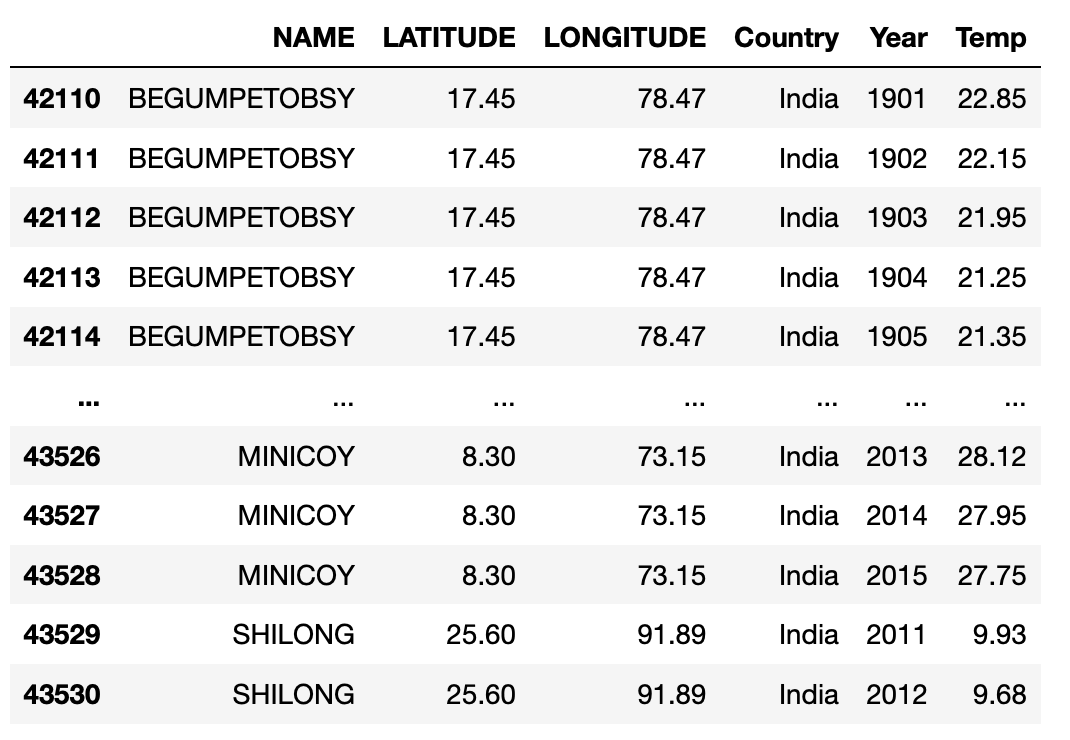

In [242]:
query_climate(df = df, country = "India", year_begin = 1901, year_end = 2020, month = 1)

,NAME,LATITUDE,LONGITUDE,Country,Year,Month,Temp
43268,PBO_ANANTAPUR,14.583,77.633,India,2011,1,23.48
43269,PBO_ANANTAPUR,14.583,77.633,India,2012,1,NaN
43270,PBO_ANANTAPUR,14.583,77.633,India,2013,1,25.20
43271,PBO_ANANTAPUR,14.583,77.633,India,2014,1,24.96
43272,PBO_ANANTAPUR,14.583,77.633,India,2015,1,24.90
...,...,...,...,...,...,...,...
44684,DARJEELING,27.050,88.270,India,1906,1,5.60
44685,DARJEELING,27.050,88.270,India,1907,1,8.05
44686,DARJEELING,27.050,88.270,India,1908,1,6.80
44687,DARJEELING,27.050,88.270,India,1909,1,6.65


## Part 4: Global warming ( 10 pts )

In this part, the goal is to create a bar plot which is used to compare average temperatures of decadeds 1901-1910 and 2011-2020.

The bar plot looks like the following:

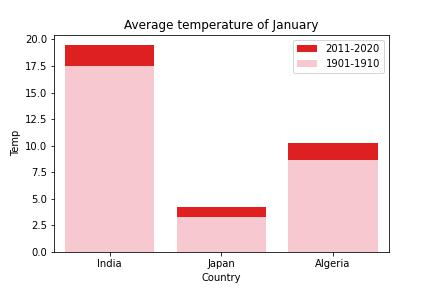

In above plot, I select three different countries and compute the average temperatures of year range 1901-1910 and 2011-2020 in January. Then, I use (two) barplot(s) to visualize the average temperature. 

**You should do more than my sample plot:**

Select 4 different countries and 6 different months, then compute two average temperatures for each country in each certain month. Then visualize 6 different plots (included in a single plot using `subplot` command). Please add necessary labels, titles, and legends to make your plot clear.

You should write a function or class to simplify your code if necessary.

What is your conclusion?

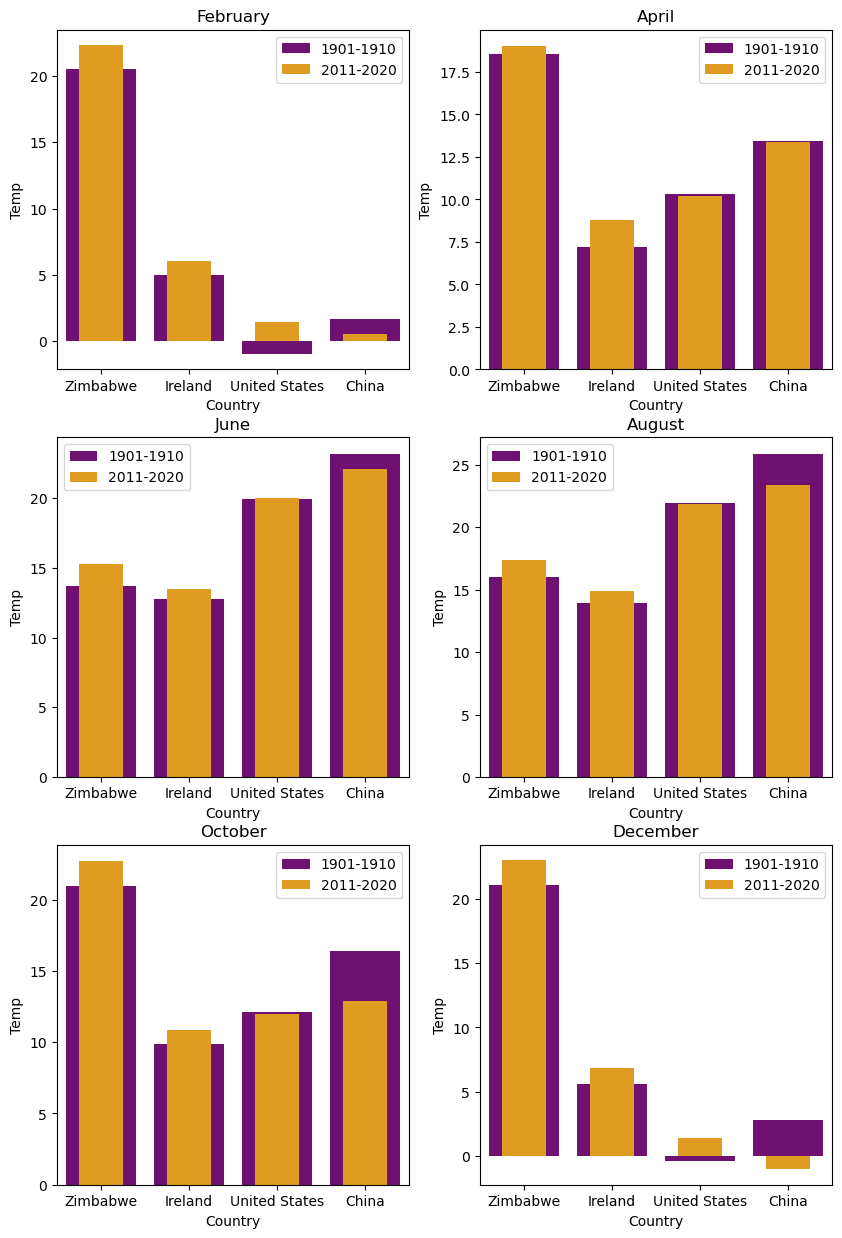

In [243]:
import warnings
warnings.filterwarnings("ignore")

#helper function
def plotter(month,monthName,coord,ax):
    """
    helper function which plots a barplot of the specified month on the specified subplot of ax
    
    Args:
        month: integer representing the numerical interpretation of a month
        monthName: string of the name of the same month as above
        coord: tuple indicating on which subplot the barplot will be graphed
        ax: axes object on which the barplot will be plotted
    Output:
        plots overlayed barplots for average temperature during the 
        specified month on the specified subplot coordinate of a given axes. 
        Countries in question are hardcoded
    
    """
    #decodes the coord into 2 integers
    a,b = coord
    #merges data for the 4 countries in 1901 - 1911 and plots it on a barplot
    data = ((query_climate(df,"Zimbabwe",1901,1910,month).merge(query_climate(df,"Ireland",1901,1910,month),how="outer")).merge(query_climate(df,"United States",1901,1910,month),how="outer")).merge(query_climate(df,"China",1901,1910,month),how="outer")
    sns.barplot(data, x = "Country",y = "Temp", errorbar = None, ax = ax[a,b], color = "Purple",alpha = 1,label = "1901-1910")
    #merges data for the 4 countries in 2011 - 2020 and plots it on a barplot
    data2 = ((query_climate(df,"Zimbabwe",2011,2020,month).merge(query_climate(df,"Ireland",2011,2020,month),how="outer")).merge(query_climate(df,"United States",2011,2020,month),how="outer")).merge(query_climate(df,"China",2011,2020,month),how="outer")
    sns.barplot(data2, x = "Country",y = "Temp", errorbar = None,ax = ax[a,b], color = "Orange", alpha = 1,width = .5,label = "2011-2020")
    
    #creates a legend and plot title
    ax[a,b].legend()
    ax[a,b].set(title = monthName)

#creates fig and ax
fig, ax = plt.subplots(3,2,figsize=(10,15))
ax[0,0]

#calls the plotter helper function for each month desired
plotter(2,"February",(0,0),ax)
plotter(4,"April",(0,1),ax)
plotter(6,"June",(1,0),ax)
plotter(8,"August",(1,1),ax)
plotter(10,"October",(2,0),ax)
plotter(12,"December",(2,1),ax)

## Part 5: Plots (15 pts)

In this part, please create at least **three** complex and interesting interactive data visualizations using the dataframe created above. These plots must be of different types (e.g. scatter plot, line plot, histogram, bar plot, and etc) and are different from what you have created in Part 4. You are also welcome to create any plots which are not discussed in the lectures.

Alongside the plots, you should clearly describe (use markdown) what you do for each plot and state your conclusions.

Requirement: You should use seaborn.

**Grading is based on the plots and your description. Your explanation should match your plot.**

[Text(0, 0.5, 'Average Temperature in $C^o$')]

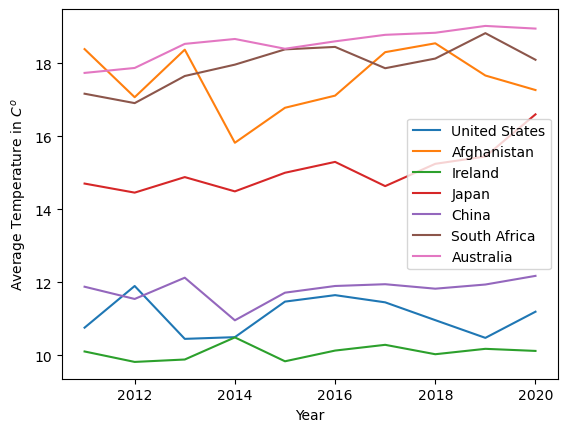

In [244]:
#creates an average yearly temperature columns by averaging monthly temperature, and converts to celsius
df["Mean"] = (df["VALUE1"]+df["VALUE2"]+df["VALUE3"]+df["VALUE4"]+df["VALUE5"]+df["VALUE6"]+df['VALUE7']+df["VALUE8"]+df["VALUE9"]+df["VALUE10"]+df["VALUE11"]+df["VALUE12"])/12
df["Mean"] = df["Mean"]/100
m = df.dropna()

#restricts attention to 2011 - 2020 and to the columns Name, Year, and Mean
m = m[["Name","Year","Mean"]][m["Year"]>2000]
#reorginizes data to be accesible by country
m = m.groupby(["Name","Year"])["Mean"].mean().unstack(level = "Year").transpose()
fig,ax = plt.subplots()

#plots a lineplot of average temperature over time for each country
sns.lineplot(m,x="Year",y ="United States", label = "United States", ax = ax)
sns.lineplot(m,x="Year",y ="Afghanistan",label = "Afghanistan", ax = ax)
sns.lineplot(m,x="Year",y ="Ireland",label = "Ireland", ax = ax)
sns.lineplot(m,x="Year",y ="Japan",label = "Japan", ax = ax)
sns.lineplot(m,x="Year",y ="China",label = "China", ax = ax)
sns.lineplot(m,x="Year",y ="South Africa",label = "South Africa", ax = ax)
sns.lineplot(m,x="Year",y ="Australia",label = "Australia", ax = ax)
ax.set(ylabel = f"Average Temperature in $C^o$")

This plot takes a selection of countries and plots their yearly average temperature by averaging monthly temperatures. The result is similar to what we might expect, with certain countries being consistenly hotter/colder than others. Additionally
while temperature is trending slightly upwards, this graph confirms the idea that the term"global warming" is misnomer. Climate change often does not manifest as rapidly increasing temperature, but with more disastrous weather events and higher variability.

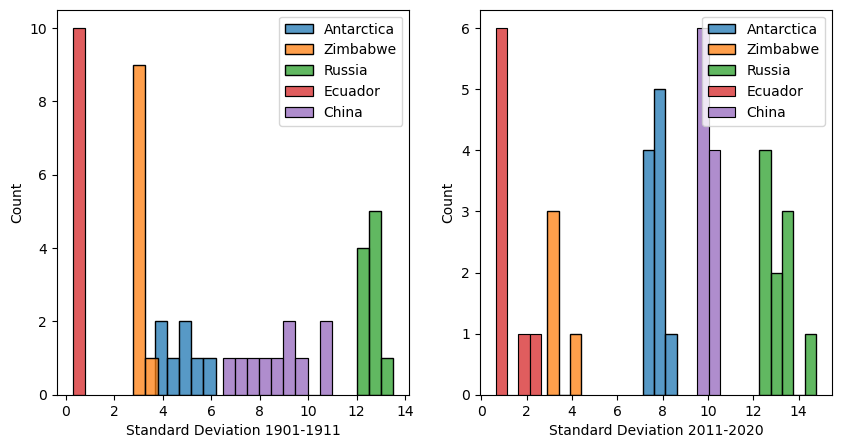

In [245]:
#computes the standard deviation of monthly temperature and assembles the data into a new column
std = df[["VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"]].std(axis=1)
df["std"] = std
df = df.dropna()

#seperates the dataframe into two subset, years 1901 - 1911 and years 2011 - 2020
std1 = df[["Year","std","Name","VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"]][df["Year"]<2000]
std2 = df[["Year","std","Name","VALUE1","VALUE2","VALUE3","VALUE4","VALUE5","VALUE6","VALUE7","VALUE8","VALUE9","VALUE10","VALUE11","VALUE12"]][df["Year"]>2000]

#reorganizes the data so that it can be accessed by country name
std1 = std1.groupby(["Name","Year"])["std"].mean().unstack(level ="Year").transpose()/100
std2 = std2.groupby(["Name","Year"])["std"].mean().unstack(level ="Year").transpose()/100

#creates 2 subplots and labels
fig,ax = plt.subplots(1,2, figsize = (10,5))
ax[0].set(xlabel = "Standard Deviation 1901-1911")
ax[1].set(xlabel = "Standard Deviation 2011-2020")

#plots histograms of the standard deviation for each of a selection of countries during both time periods
sns.histplot(std1, x = "Antarctica", label = "Antarctica", ax = ax[0],binwidth = .5)
sns.histplot(std2, x = "Antarctica", label = "Antarctica", ax = ax[1],binwidth = .50)
sns.histplot(std1, x = "Zimbabwe", label = "Zimbabwe", ax = ax[0],binwidth = .50)
sns.histplot(std2, x = "Zimbabwe", label = "Zimbabwe", ax = ax[1],binwidth = .50)
sns.histplot(std1, x = "Russia", label = "Russia", ax = ax[0],binwidth = .50)
sns.histplot(std2, x = "Russia", label = "Russia", ax = ax[1],binwidth = .50)
sns.histplot(std1, x = "Ecuador", label = "Ecuador", ax = ax[0],binwidth = .50)
sns.histplot(std2, x = "Ecuador", label = "Ecuador", ax = ax[1],binwidth = .50)
sns.histplot(std1, x = "China", label = "China", ax = ax[0],binwidth = .50)
sns.histplot(std2, x = "China", label = "China", ax = ax[1],binwidth = .50)
ax[0].legend()
ax[1].legend()

This takes a selections of countries and plots their standard deviation of monthly temperature for two distinct time periods side by side. From the data we can see that certain countries have highly variable climates such as Russia, while others such as Ecuador vary very little. In addition we see that the montly standard deviation is increasing countrywise across the board, and especially for Antartica. This aligns with our expectation that climate change is leading to a higher variability in climates across the globe, and is especially affecting the poles.

In [ ]:
#initializes an empty 2d array of zeros, representing a coordinate lattice of Earth
a = list(np.zeros((72,144)))
#sets each element to the average of January temperatures measured in the corresponding longitude/latitude region
for i in range(-35,37):
    for j in range(-71,73):
        a[(i+35)][(j+71)]= df[df["LATITUDE"] > 5*i-5][df["LATITUDE"] < 5*i][df["LONGITUDE"]> 5*j-5][df["LONGITUDE"] < 5*j]["VALUE1"].dropna().mean()


In [ ]:
#restricts the focus of the array to remove nan regions
b = np.array(a)
b = b[18:53,36:108]/100
#plots a heatmap of measured January temperature for each longitude/latitude coordinate region
ax = sns.heatmap(b,cbar_kws={'label': f'Temperature in $C^o$'})

#formats the plot to be north aligned and adds labels
ax.invert_yaxis()
ax.set(xlabel = "Longitude",ylabel = "Latitude", title = "Average January Temperature")
plt.show()

This plots takes the longitude/latitude coordinates of weather stations and plots the average January temperature for all stations in a given region as a heatmap. This plots visualizes where there may be a difficiency in weather stations by looking at land regions with no data, such as in many parts of Africa. In additions we can clearly see the trend in global temperature as a function of distance from the equator, as we would expect. This plot could be repeated for each month year-over-year to create an animation depicting global trends in temperature.

## Publish (5 pts)

Publish your work on github: Create a repository called HW in your github account, then upload your jupyter notebook. You should create a readme.md file to describe this repository. Please include the link in this cell